# Wine Quality Prediction

# Problem statement
Predicting the quality of the wine as whether:

 >Good quality 

 >Poor quality

 

# Dataset:
The dataset was obtained from kaggle with the following input variables and output variable:

Input variables/independent variables/features

1 - Fixed acidity=most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - Vlatile acidity=the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - Citric acid=found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - Residual sugar=the amount of sugar remaining after fermentation stops

5 - Chlorides=the amount of salt in the wine

6 - Free sulfur dioxide=the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion

7 - Total sulfur dioxide=amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine

8 - Density=the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH=describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14

10 - Sulphates=a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial

11 - Alcohol=amount of alcohol in wine

Output variable (based on sensory data):

12 - Quality ('good' and 'bad' based on score >5 and <5)

#  Tool/Libraries for building the model
Pandas for loading the data an for data analysis

Numpy(numerical python) for numerical operations

Natplotlib/seaborn used in data visualization

Standardscaler for feature engineering

Train_test_split for splitting the data

Sklearn/scikit learnfor model building

Metrics for model evaluation

Pyforest is a library for making our work easier it imports th necessary libraries for EDA.


In [1]:
import pyforest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
#loading the dataset
data=pd.read_csv("WineQT.csv")
# Showing the first five rows of our data
data.head()

<IPython.core.display.Javascript object>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Shows the last five rows of our data
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


## Explaratory Data Analysis

In [4]:
#Getting the shape of the data
data.shape

(1143, 13)

In [5]:
#Getting the column names
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [6]:
#checking for null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
#checking for duplicates
data.duplicated().sum()

0

In [8]:
#getting the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
#getting teh statistical summary
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
#getting the value counts for the target variable
data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [11]:
#getting the unique values
data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
# We drop the column Id  because it will not be used anywhere
data=data.drop(["Id"],axis=1)

In [13]:
# Cheking if it has dropped the column Id
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
# Getting the size of the data after dropping column Id
data.shape

(1143, 12)

## Data visualization

In [15]:
# To ignore and filter all warnings
import warnings 
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'quality distribution')

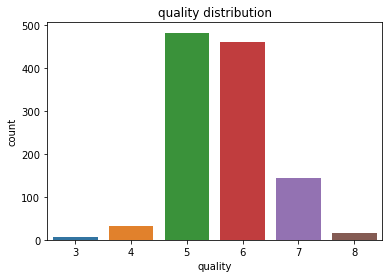

In [16]:
# Visualizing the target variable("quality")
sns.countplot(data['quality'])
plt.title("quality distribution")

<IPython.core.display.Javascript object>

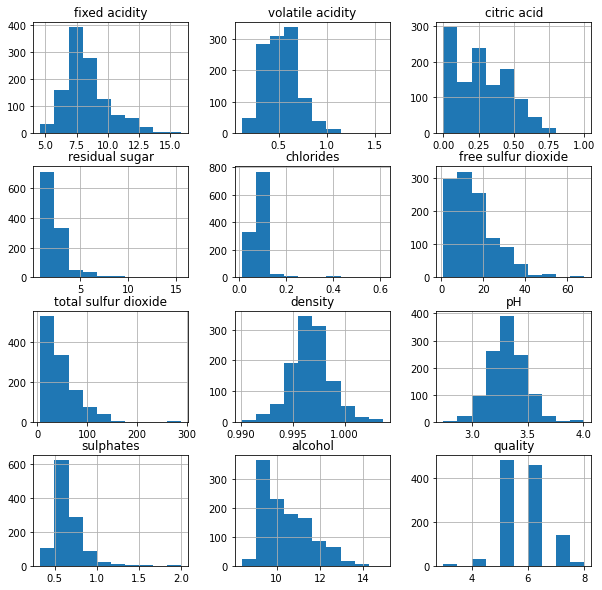

In [17]:
# Histogram  for all the collumns
data.hist(figsize=(10,10),bins=10)
plt.show()

Each bar in the histogram corresponds to a range of values, and the height of the bar indicates the frequency (or count) of values within that range. Histograms are particularly useful for understanding the shape of the distribution, identifying patterns, and spotting outliers in your data. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'the correlation shows the relationship between variables')

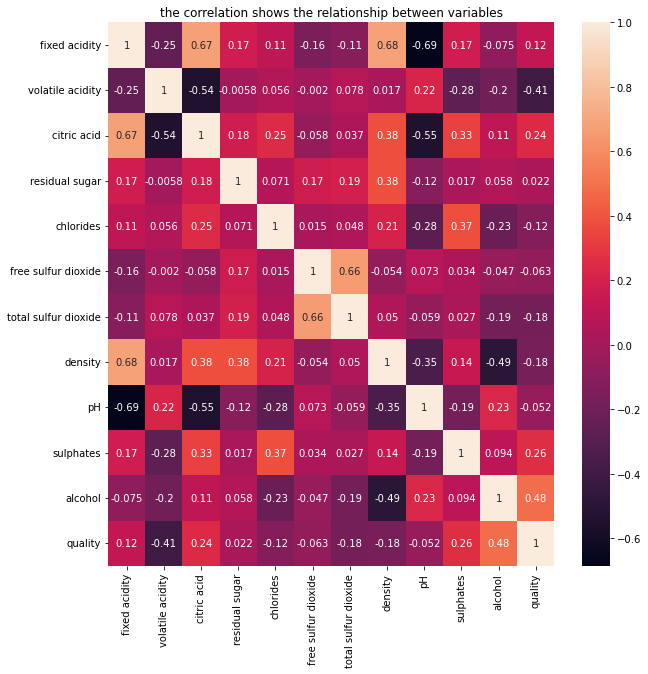

In [18]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.title("the correlation shows the relationship between variables")

A visual representation of the correlation matrix, which is a table showing correlation coefficients between variables. The heatmap allows you to quickly identify which variables are positively or negatively correlated and the strength of these relationships. The annotation of the heatmap with actual correlation values provides additional quantitative information.
The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. It ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. The correlation coefficient is sensitive to the scale of the variables.

## Data preprocessing

In [19]:
# We now want to get the quality ('good' and 'bad' based on score >5 and <5 respectively)
# We create a new column goodquality with 1 for good and 0 for bad quality.
data["goodquality"]=[1 if x<=5 else 0 for x in data["quality"]]
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,1


## Seperating the dataset

In [20]:
#seperating the target variable and the features
x=data.drop(["quality","goodquality"],axis=1)
y=data["goodquality"]

## Spliting  the dataset into train and test data

In [21]:
# Splitting the data  into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
# Fitting the model using randomforestcalssifier
# We give the RandomClassifier a variable name rf
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
# Evaluating the performance of x_test
predicting=rf.predict(x_test)

In [27]:
# Evaluating the performance of the model using confusion matrix
confusion_matrix(y_test,predicting)

array([[97, 21],
       [29, 82]], dtype=int64)

The top-left cell (97) is the number of instances that were correctly predicted as positive (True Positives).

The top-right cell (21) is the number of instances that were predicted as positive but were actually negative (False Positives).

The bottom-left cell (29) is the number of instances that were predicted as negative but were actually positive (False Negatives).

The bottom-right cell (82) is the number of instances that were correctly predicted as negative (True Negatives).

In [28]:
#evaluating the performance of the model using accuracy_score
print(accuracy_score(y_test,predicting)*100)

78.16593886462883


## Building  a predictive model

In [29]:
input_data=(6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,)
# Changing input data into numpy array
convert=np.asarray(input_data)
# Reshaping data as we are predicting the label for one instance
reshaping=convert.reshape(1,-1)
prediction=rf.predict(reshaping)
print(prediction)
if(prediction[0]==1):
    print("good quality wine")
else:
    print("poor quality wine")

<IPython.core.display.Javascript object>

[0]
poor quality wine


Picking random data from the data we have, we create a predictive model to see and tell how well the model is making the predictions from unseen/new data. 

# Hureeeeeeeyyyyyyy I hope you enjoy!!!